In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

import nltk
import re
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
import string
string.punctuation

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

### I. Matrix 1

In [2]:
df = pd.read_csv('/Users/arnav/Downloads/data.csv')

df.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,"pleasant hill, california",likes dogs,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,"oakland, california",has dogs and likes cats,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,"daly city, california",likes dogs and likes cats,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,sketching,acting,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,"oakland, california",likes dogs and likes cats,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,craft,designing,same city


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2001 non-null   object 
 1   username             2001 non-null   object 
 2   age                  2001 non-null   int64  
 3   status               2001 non-null   object 
 4   sex                  2001 non-null   object 
 5   orientation          2001 non-null   object 
 6   drinks               2001 non-null   object 
 7   drugs                2001 non-null   object 
 8   height               2001 non-null   float64
 9   job                  2001 non-null   object 
 10  location             2001 non-null   object 
 11  pets                 2001 non-null   object 
 12  smokes               2001 non-null   object 
 13  language             2001 non-null   object 
 14  new_languages        2001 non-null   object 
 15  body_profile         2001 non-null   o

#### user id

In [4]:
df.user_id.nunique()

2001

---
#### username

In [5]:
df.drop('username', axis=1, inplace=True)

---
#### age

In [6]:
df.age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    2001.000000
mean       33.072464
std        10.483189
min        18.000000
25%        26.000000
50%        30.000000
75%        39.000000
90%        49.000000
95%        55.000000
99%        64.000000
max        69.000000
Name: age, dtype: float64

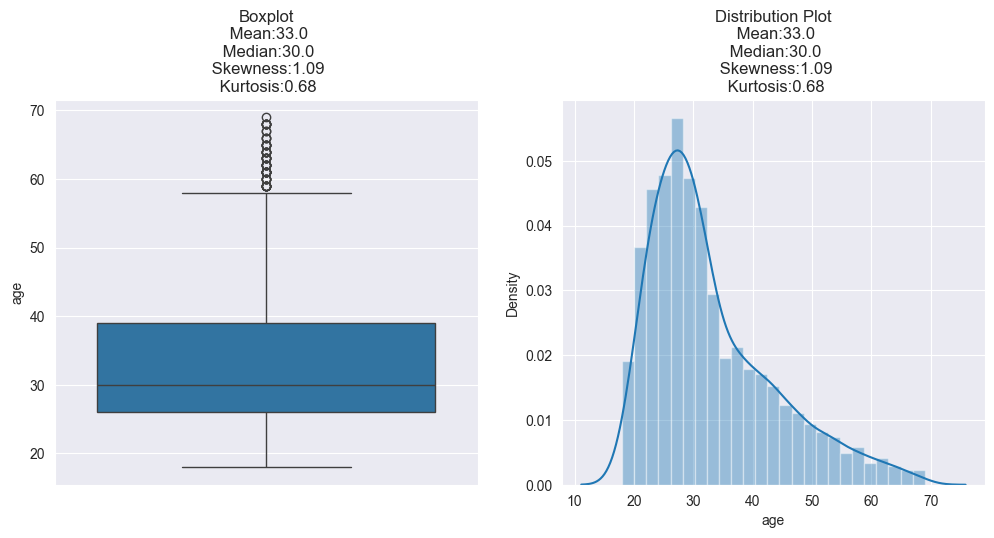

In [7]:
plt.figure(figsize=(12,5))

skewness = round(df.age.skew(),2)
kurtosis = round(df.age.kurtosis(),2)
mean = round(np.mean(df.age),0)
median = np.median(df.age)

plt.subplot(1,2,1)
sns.boxplot(y=df.age)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(df.age)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

In [8]:
df['age_bin'] = pd.cut(df.age, bins=[17,24,30,40,50,70],labels=['17-24','25-30','31-40','41-50','50+'])

In [9]:
aged = pd.get_dummies(df.age_bin,prefix='age_')
df = pd.concat([df,aged], axis=1)
df.drop(['age','age_bin'],axis=1,inplace=True)

---
#### Height

In [10]:
df.height.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    2001.000000
mean       68.289855
std         3.895246
min        55.000000
25%        65.000000
50%        68.000000
75%        71.000000
90%        73.000000
95%        75.000000
99%        77.000000
max        83.000000
Name: height, dtype: float64

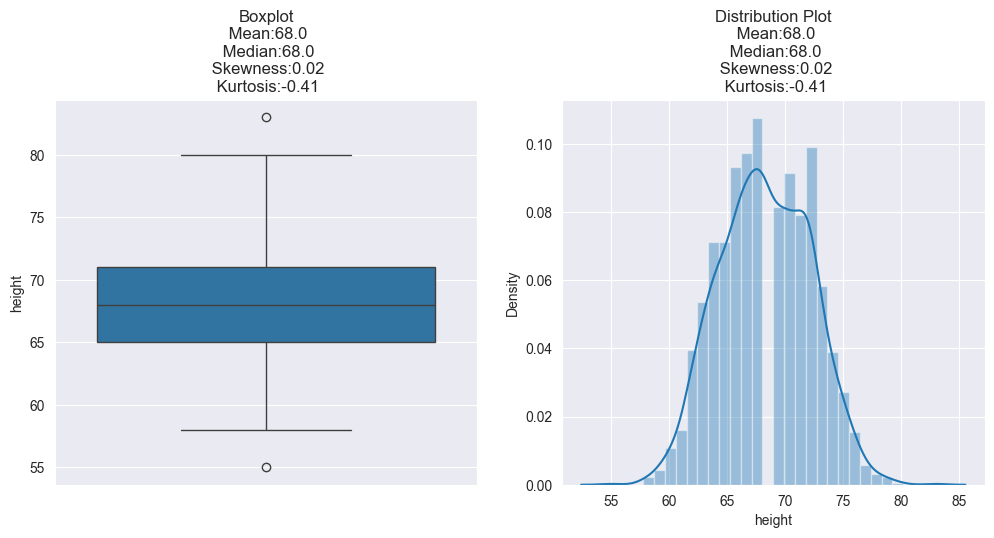

In [11]:
plt.figure(figsize=(12,5))

skewness = round(df.height.skew(),2)
kurtosis = round(df.height.kurtosis(),2)
mean = round(np.mean(df.height),0)
median = np.median(df.height)

plt.subplot(1,2,1)
sns.boxplot(y=df.height)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(df.height)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

In [12]:
df['height_feet'] = round(df['height']*0.08333,1)

In [13]:
df.height_feet.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    2001.000000
mean        5.683658
std         0.326524
min         4.600000
25%         5.400000
50%         5.700000
75%         5.900000
90%         6.100000
95%         6.200000
99%         6.400000
max         6.900000
Name: height_feet, dtype: float64

In [14]:
df['height_bin'] = pd.cut(df.height_feet,bins=[4,5,6,7],labels=['4-5feets','5-6feets','6-7feets'],right=False)

In [15]:
heightd = pd.get_dummies(df.height_bin,prefix='height_')
df = pd.concat([df,heightd], axis=1)
df.drop(['height','height_feet','height_bin'],axis=1,inplace=True)

---
#### status

In [16]:
df.status.value_counts(normalize=True)

status
single            0.933033
available         0.032984
seeing someone    0.026987
married           0.006997
Name: proportion, dtype: float64

In [17]:
df['status'] = df['status'].replace('available','single')

In [18]:
statusd = pd.get_dummies(df.status,prefix='status_')
df = pd.concat([df,statusd], axis=1)
df.drop('status',axis=1,inplace=True)

---
#### sex

In [19]:
df.sex.value_counts(normalize=True)

sex
m    0.569215
f    0.430785
Name: proportion, dtype: float64

In [20]:
df['sex'] = df['sex'].replace(('m','f'),(1,0))

---
#### orientation

In [21]:
df.orientation.value_counts(normalize=True)

orientation
straight    0.867566
gay         0.076462
bisexual    0.055972
Name: proportion, dtype: float64

In [22]:
df['looking_for'] = np.NaN

df[(df.orientation=='straight') & (df.sex==1)]['looking_for']='female'
df[(df.orientation=='straight') & (df.sex==0)]['looking_for']='male'

df[(df.orientation=='gay') & (df.sex==1)]['looking_for']='male'
df[(df.orientation=='gay') & (df.sex==0)]['looking_for']='female'

df[(df.orientation=='bisexual') & (df.sex==1)]['looking_for']='both'
df[(df.orientation=='bisexual') & (df.sex==0)]['looking_for']='both'

In [23]:
df.drop('orientation',axis=1,inplace=True)

In [24]:
lfd = pd.get_dummies(df.looking_for,prefix='looking_')
df = pd.concat([df,lfd], axis=1)
df.drop('looking_for',axis=1,inplace=True)

---
#### drinks

In [25]:
df.drinks.value_counts(normalize=True)

drinks
socially       0.696152
rarely         0.127936
often          0.083958
not at all     0.078461
very often     0.007996
desperately    0.005497
Name: proportion, dtype: float64

In [26]:
drinkd = pd.get_dummies(df.drinks,prefix='drink_')
df = pd.concat([df,drinkd], axis=1)
df.drop('drinks',axis=1,inplace=True)

---
#### drugs

In [27]:
df.drugs.value_counts(normalize=True)

drugs
never        0.792604
sometimes    0.198401
often        0.008996
Name: proportion, dtype: float64

In [28]:
drugd = pd.get_dummies(df.drugs,prefix='drug_')
df = pd.concat([df,drugd], axis=1)
df.drop('drugs',axis=1,inplace=True)

---
#### job

In [29]:
df.job.value_counts(normalize=True)

job
other                                0.142929
student                              0.112944
artistic / musical / writer          0.087956
science / tech / engineering         0.081459
medicine / health                    0.078961
computer / hardware / software       0.077961
sales / marketing / biz dev          0.077961
education / academia                 0.065467
executive / management               0.046477
banking / financial / real estate    0.039480
entertainment / media                0.038981
law / legal services                 0.026987
construction / craftsmanship         0.025987
hospitality / travel                 0.022989
clerical / administrative            0.016992
political / government               0.016492
transportation                       0.010995
retired                              0.008996
rather not say                       0.008496
unemployed                           0.007996
military                             0.003498
Name: proportion, dtype: float

In [30]:
df['job'] = df['job'].replace(('retired','rather not say','unemployed','military'),
                             ('other','other','other','other'))

In [31]:
jd = pd.get_dummies(df.job,prefix='job_')
df = pd.concat([df,jd], axis=1)
df.drop('job',axis=1,inplace=True)

---
##### location

In [32]:
locn = df[['location']]
locn[['city','state']] = locn.location.str.split(',',expand=True)

In [33]:
locd = pd.get_dummies(locn.city,prefix='lives_in_')
locn = pd.concat([locn,locd], axis=1)

locn.head()

,location,city,state,lives_in__alameda,lives_in__albany,lives_in__atherton,lives_in__belmont,lives_in__belvedere tiburon,lives_in__benicia,lives_in__berkeley,lives_in__brisbane,lives_in__brooklyn,lives_in__burlingame,lives_in__canyon country,lives_in__castro valley,lives_in__cincinnati,lives_in__corte madera,lives_in__daly city,lives_in__el cerrito,lives_in__el sobrante,lives_in__emeryville,lives_in__fairfax,lives_in__foster city,lives_in__fremont,lives_in__green brae,lives_in__hacienda heights,lives_in__half moon bay,lives_in__hayward,lives_in__hercules,lives_in__lafayette,lives_in__lagunitas,lives_in__larkspur,lives_in__martinez,lives_in__menlo park,lives_in__mill valley,lives_in__millbrae,lives_in__montara,lives_in__moraga,lives_in__moss beach,lives_in__mountain view,lives_in__nha trang,lives_in__north hollywood,lives_in__novato,lives_in__oakland,lives_in__orinda,lives_in__pacifica,lives_in__palo alto,lives_in__petaluma,lives_in__phoenix,lives_in__pinole,lives_in__pleasant hill,lives_in__point richmond,lives_in__redwood city,lives_in__richmond,lives_in__rodeo,lives_in__san anselmo,lives_in__san bruno,lives_in__san carlos,lives_in__san francisco,lives_in__san leandro,lives_in__san lorenzo,lives_in__san mateo,lives_in__san pablo,lives_in__san rafael,lives_in__santa rosa,lives_in__sausalito,lives_in__south san francisco,lives_in__stanford,lives_in__stockton,lives_in__vallejo,lives_in__walnut creek,lives_in__woodacre,lives_in__woodside
0,"oakland, california",oakland,california,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"pleasant hill, california",pleasant hill,california,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,"oakland, california",oakland,california,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,"daly city, california",daly city,california,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,"oakland, california",oakland,california,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
locn.iloc[:,3:].sum().sort_values(ascending=False).index

Index(['lives_in__san francisco', 'lives_in__oakland', 'lives_in__berkeley',
       'lives_in__san mateo', 'lives_in__palo alto', 'lives_in__san rafael',
       'lives_in__alameda', 'lives_in__san leandro', 'lives_in__redwood city',
       'lives_in__emeryville', 'lives_in__daly city', 'lives_in__walnut creek',
       'lives_in__hayward', 'lives_in__pacifica', 'lives_in__el cerrito',
       'lives_in__menlo park', 'lives_in__martinez', 'lives_in__burlingame',
       'lives_in__benicia', 'lives_in__richmond', 'lives_in__mountain view',
       'lives_in__vallejo', 'lives_in__south san francisco',
       'lives_in__mill valley', 'lives_in__novato', 'lives_in__pleasant hill',
       'lives_in__castro valley', 'lives_in__lafayette',
       'lives_in__san carlos', 'lives_in__belmont', 'lives_in__el sobrante',
       'lives_in__san bruno', 'lives_in__half moon bay', 'lives_in__millbrae',
       'lives_in__fremont', 'lives_in__hercules', 'lives_in__albany',
       'lives_in__san pablo', 'lives

In [35]:
locn.iloc[:,3:].sum().sort_values(ascending=False).values

array([911, 250, 146,  56,  45,  35,  35,  33,  28,  27,  27,  24,  21,
        18,  17,  16,  15,  15,  15,  15,  15,  14,  14,  14,  13,  13,
        12,  11,   9,   9,   8,   8,   7,   7,   7,   6,   6,   6,   6,
         6,   5,   5,   5,   5,   5,   4,   3,   2,   2,   2,   2,   2,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1])

Here we just looking for cities whose count is more than 20 and combine rest of the cities into the 'other' category

In [36]:
locn = locn[['lives_in__san francisco', 'lives_in__oakland', 'lives_in__berkeley','lives_in__san mateo', 'lives_in__palo alto', 
             'lives_in__alameda','lives_in__san rafael', 'lives_in__san leandro','lives_in__redwood city', 
             'lives_in__emeryville', 'lives_in__daly city','lives_in__walnut creek', 'lives_in__hayward', 'lives_in__pacifica',
             'lives_in__el cerrito', 'lives_in__menlo park','lives_in__mountain view', 'lives_in__richmond', 
             'lives_in__martinez','lives_in__burlingame', 'lives_in__benicia', 'lives_in__vallejo','lives_in__mill valley', 
             'lives_in__south san francisco','lives_in__pleasant hill', 'lives_in__novato','lives_in__castro valley', 
             'lives_in__lafayette','lives_in__san carlos', 'lives_in__belmont', 'lives_in__san bruno','lives_in__el sobrante', 
             'lives_in__millbrae', 'lives_in__fremont','lives_in__half moon bay', 'lives_in__albany', 'lives_in__hercules',
             'lives_in__stanford', 'lives_in__san pablo', 'lives_in__san lorenzo','lives_in__fairfax', 'lives_in__atherton', 
             'lives_in__moraga','lives_in__sausalito', 'lives_in__san anselmo','lives_in__corte madera', 'lives_in__woodacre', 
             'lives_in__green brae','lives_in__belvedere tiburon', 'lives_in__rodeo', 'lives_in__orinda','lives_in__larkspur', 
             'lives_in__pinole', 'lives_in__canyon country','lives_in__stockton', 'lives_in__santa rosa', 'lives_in__brisbane',
             'lives_in__brooklyn', 'lives_in__point richmond', 'lives_in__lagunitas','lives_in__cincinnati', 'lives_in__phoenix',
             'lives_in__petaluma','lives_in__north hollywood', 'lives_in__nha trang','lives_in__foster city', 
             'lives_in__moss beach','lives_in__hacienda heights', 'lives_in__montara','lives_in__woodside']]

In [37]:
locn['others'] = locn.iloc[:,13:].sum(axis=1).astype('int')

In [38]:
locn = locn[['lives_in__san francisco', 'lives_in__oakland', 'lives_in__berkeley','lives_in__san mateo', 'lives_in__palo alto', 
             'lives_in__alameda','lives_in__san rafael', 'lives_in__san leandro','lives_in__redwood city', 
             'lives_in__emeryville', 'lives_in__daly city','lives_in__walnut creek', 'lives_in__hayward','others', 
             'lives_in__pacifica','lives_in__el cerrito', 'lives_in__menlo park','lives_in__mountain view', 'lives_in__richmond', 
             'lives_in__martinez','lives_in__burlingame', 'lives_in__benicia', 'lives_in__vallejo','lives_in__mill valley', 
             'lives_in__south san francisco','lives_in__pleasant hill', 'lives_in__novato','lives_in__castro valley', 
             'lives_in__lafayette','lives_in__san carlos', 'lives_in__belmont', 'lives_in__san bruno','lives_in__el sobrante', 
             'lives_in__millbrae', 'lives_in__fremont','lives_in__half moon bay', 'lives_in__albany', 'lives_in__hercules',
             'lives_in__stanford', 'lives_in__san pablo', 'lives_in__san lorenzo','lives_in__fairfax', 'lives_in__atherton', 
             'lives_in__moraga','lives_in__sausalito', 'lives_in__san anselmo','lives_in__corte madera', 'lives_in__woodacre', 
             'lives_in__green brae','lives_in__belvedere tiburon', 'lives_in__rodeo', 'lives_in__orinda','lives_in__larkspur', 
             'lives_in__pinole', 'lives_in__canyon country','lives_in__stockton', 'lives_in__santa rosa', 'lives_in__brisbane',
             'lives_in__brooklyn', 'lives_in__point richmond', 'lives_in__lagunitas','lives_in__cincinnati', 'lives_in__phoenix',
             'lives_in__petaluma','lives_in__north hollywood', 'lives_in__nha trang','lives_in__foster city', 
             'lives_in__moss beach','lives_in__hacienda heights', 'lives_in__montara','lives_in__woodside']]

In [39]:
locn = locn.iloc[:,:14]

In [40]:
df = pd.concat([df,locn],axis=1)

df.drop('location',axis=1,inplace=True)

---
#### pets

In [41]:
df.pets.value_counts(normalize=True)

pets
likes dogs and likes cats          0.371314
likes dogs                         0.151424
likes dogs and has cats            0.114443
has dogs                           0.091954
has dogs and likes cats            0.073963
likes dogs and dislikes cats       0.060470
has dogs and has cats              0.043478
has cats                           0.031484
likes cats                         0.029485
has dogs and dislikes cats         0.011994
dislikes dogs and dislikes cats    0.008496
dislikes dogs and likes cats       0.004498
dislikes cats                      0.002499
dislikes dogs                      0.002499
dislikes dogs and has cats         0.001999
Name: proportion, dtype: float64

In [42]:
def pet_like(txt):
    if txt.find('likes dogs and likes cats')!= -1:
        return 'dog and cat'
    elif txt.find('likes dogs')!= -1:
        return 'dog'
    elif txt.find('likes cats')!= -1:
        return 'cat'
    else:
        return 'none'

df['pet_like'] = df['pets'].apply(lambda x: pet_like(x))

In [43]:
def pet_owned(txt):
    if txt.find('has dogs and has cats')!= -1:
        return 'dog and cat'
    elif txt.find('has dogs')!= -1:
        return 'dog'
    elif txt.find('has cats')!= -1:
        return 'cat'
    else:
        return 'none'

df['pet_owned'] = df['pets'].apply(lambda x: pet_owned(x))

In [44]:
petld = pd.get_dummies(df.pet_like,prefix='petLike_')
df = pd.concat([df,petld], axis=1)
df.drop('pet_like',axis=1,inplace=True)

In [45]:
petod = pd.get_dummies(df.pet_owned,prefix='petOwn_')
df = pd.concat([df,petod], axis=1)
df.drop('pet_owned',axis=1,inplace=True)

In [46]:
df.drop('pets',axis=1,inplace=True)

---
#### smokes

In [47]:
df.smokes.value_counts(normalize=True)

smokes
no                0.814593
sometimes         0.063968
yes               0.046977
when drinking     0.045477
trying to quit    0.028986
Name: proportion, dtype: float64

In [48]:
df['smokes'] = df['smokes'].replace('trying to quit','sometimes')
df['smokes'] = df['smokes'].replace('when drinking','sometimes')

In [49]:
smoked = pd.get_dummies(df.smokes,prefix='smoke_')
df = pd.concat([df,smoked], axis=1)
df.drop('smokes',axis=1,inplace=True)

---
#### new language

In [50]:
df.new_languages.value_counts(normalize=True)

new_languages
not interested         0.524738
interested             0.316342
somewhat interested    0.158921
Name: proportion, dtype: float64

In [51]:
nld = pd.get_dummies(df.new_languages,prefix='new_lang_')
df = pd.concat([df,nld], axis=1)
df.drop('new_languages',axis=1,inplace=True)

---
#### body profile

In [52]:
df.body_profile.value_counts(normalize=True)

body_profile
average           0.278361
fit               0.216392
athletic          0.192404
curvy             0.089455
thin              0.080460
a little extra    0.054973
skinny            0.032484
full figured      0.021489
overweight        0.012494
used up           0.009995
jacked            0.006497
rather not say    0.004998
Name: proportion, dtype: float64

In [53]:
bd = pd.get_dummies(df.body_profile,prefix='body_')
df = pd.concat([df,bd], axis=1)
df.drop('body_profile',axis=1,inplace=True)

---
#### education level

In [54]:
df.education_level.value_counts(normalize=True)

education_level
3.0    0.502249
2.0    0.238381
4.0    0.203898
1.0    0.035982
5.0    0.019490
Name: proportion, dtype: float64

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['education_level'] = scaler.fit_transform(df[['education_level']])

---
#### dropped out

In [56]:
df.dropped_out.value_counts(normalize=True)

dropped_out
no     0.948526
yes    0.051474
Name: proportion, dtype: float64

In [57]:
df['dropped_out'] = df['dropped_out'].replace(('no','yes'),(0,1))

---
#### interests and other_interests

In [58]:
df.interests.value_counts(normalize=True)

interests
music                0.077461
politics             0.052474
reading              0.052474
singing              0.050475
photography          0.045977
instruments          0.043978
video games          0.043478
painting             0.041479
sports               0.041479
movies               0.039480
dancing              0.037481
travelling           0.036982
cooking              0.033483
designing            0.031984
craft                0.031984
sketching            0.031984
food                 0.029985
diy                  0.024488
gardening            0.023988
writting             0.023488
studying             0.023488
social_networking    0.022989
yoga                 0.022989
organising events    0.021489
makeup               0.020990
acting               0.020490
astronomy            0.018491
calligraphy          0.016492
fishing              0.016492
collectibles         0.013493
camping              0.007996
Name: proportion, dtype: float64

In [59]:
df.other_interests.value_counts(normalize=True)

other_interests
music                0.078961
sports               0.050975
reading              0.049975
photography          0.049975
singing              0.048976
politics             0.046977
video games          0.044978
dancing              0.043978
painting             0.042479
movies               0.040480
craft                0.038981
instruments          0.035982
sketching            0.033483
travelling           0.030985
designing            0.030485
makeup               0.028486
social_networking    0.028486
food                 0.026987
diy                  0.026487
writting             0.024988
cooking              0.024488
gardening            0.024488
acting               0.022489
fishing              0.018991
studying             0.017991
astronomy            0.017491
yoga                 0.017491
organising events    0.016992
calligraphy          0.016492
collectibles         0.010495
camping              0.009495
Name: proportion, dtype: float64

In [60]:
s1 = set(df.interests.value_counts(normalize=True).index)
s2 = set(df.other_interests.value_counts(normalize=True).index)
s3 = s1.union(s2)

In [61]:
df['hobbies'] = df['interests']+','+df['other_interests']

In [62]:
for col in list(s3):
    df[col] = df.hobbies.str.find(col).apply(lambda x: 0 if x==-1 else 1)

In [63]:
df.drop(['interests','other_interests','hobbies'],axis=1,inplace=True)

In [64]:
df.location_preference.value_counts(normalize=True)

location_preference
same city     0.584208
same state    0.247376
anywhere      0.168416
Name: proportion, dtype: float64

In [65]:
locd = pd.get_dummies(df.location_preference,prefix='location_pref_')
df = pd.concat([df,locd], axis=1)
df.drop('location_preference',axis=1,inplace=True)

---
#### language

In [66]:
lang = df[['language']]

lang[['L1','L2','L3','L4','L5']] = lang.language.str.split(',',expand=True)

lang.head(10)

,language,L1,L2,L3,L4,L5
0,"english (fluently), spanish (poorly), sign lan...",english (fluently),spanish (poorly),sign language (poorly),None,None
1,"english (fluently), tagalog (okay), french (po...",english (fluently),tagalog (okay),french (poorly),None,None
2,"english (fluently), sign language (poorly), fr...",english (fluently),sign language (poorly),french (poorly),italian (poorly),None
3,english,english,None,None,None,None
4,english,english,None,None,None,None
5,english (fluently),english (fluently),None,None,None,None
6,english (fluently),english (fluently),None,None,None,None
7,english (fluently),english (fluently),None,None,None,None
8,"english (fluently), spanish (okay)",english (fluently),spanish (okay),None,None,None
9,"english, french, german, chinese, sign language",english,french,german,chinese,sign language


In [67]:
lang.isnull().sum()

language       0
L1             0
L2           856
L3          1475
L4          1799
L5          1915
dtype: int64

In [68]:
lang['L2'] = lang['L2'].replace(np.NaN, 'None')
lang['L3'] = lang['L3'].replace(np.NaN, 'None')
lang['L4'] = lang['L4'].replace(np.NaN, 'None')
lang['L5'] = lang['L5'].replace(np.NaN, 'None')

In [69]:
def fluent(txt):
    l1 = list(txt)
    l2 = list(txt.str.contains('(fluently)'))
    l3 = []
    for i,j in enumerate(l2):
        if j==True:
            l3.append(l1[i])
        else:
            l3.append('None')
    return l3

In [70]:
lang['F1'] = fluent(lang['L1'])
lang['F2'] = fluent(lang['L2'])
lang['F3'] = fluent(lang['L3'])
lang['F4'] = fluent(lang['L4'])
lang['F5'] = fluent(lang['L5'])

In [71]:
lang.head()

,language,L1,L2,L3,L4,L5,F1,F2,F3,F4,F5
0,"english (fluently), spanish (poorly), sign lan...",english (fluently),spanish (poorly),sign language (poorly),None,None,english (fluently),None,None,None,None
1,"english (fluently), tagalog (okay), french (po...",english (fluently),tagalog (okay),french (poorly),None,None,english (fluently),None,None,None,None
2,"english (fluently), sign language (poorly), fr...",english (fluently),sign language (poorly),french (poorly),italian (poorly),None,english (fluently),None,None,None,None
3,english,english,None,None,None,None,None,None,None,None,None
4,english,english,None,None,None,None,None,None,None,None,None


In [72]:
lang.isnull().sum()

language    0
L1          0
L2          0
L3          0
L4          0
L5          0
F1          0
F2          0
F3          0
F4          0
F5          0
dtype: int64

In [73]:
lang['F1'] = lang['F1'].str.strip()
lang['F2'] = lang['F2'].str.strip()
lang['F3'] = lang['F3'].str.strip()
lang['F4'] = lang['F4'].str.strip()
lang['F5'] = lang['F5'].str.strip()

In [74]:
f1 = set(lang.F1.unique())
f2 = set(lang.F2.unique())
f3 = set(lang.F3.unique())
f4 = set(lang.F4.unique())
f5 = set(lang.F5.unique())

In [75]:
u1 = f1.union(f2)
u2 = u1.union(f3)
u3 = u2.union(f4)
u4 = u3.union(f5)

In [76]:
lang.head()

,language,L1,L2,L3,L4,L5,F1,F2,F3,F4,F5
0,"english (fluently), spanish (poorly), sign lan...",english (fluently),spanish (poorly),sign language (poorly),None,None,english (fluently),None,None,None,None
1,"english (fluently), tagalog (okay), french (po...",english (fluently),tagalog (okay),french (poorly),None,None,english (fluently),None,None,None,None
2,"english (fluently), sign language (poorly), fr...",english (fluently),sign language (poorly),french (poorly),italian (poorly),None,english (fluently),None,None,None,None
3,english,english,None,None,None,None,None,None,None,None,None
4,english,english,None,None,None,None,None,None,None,None,None


In [77]:
for col in list(u4):
    lang[col] = lang.language.str.find(col).apply(lambda x: 0 if x==-1 else 1)

In [78]:
lang['lang_known'] = lang['language'].apply(lambda x:len(x.split(',')))

In [79]:
lang.sample(10)

,language,L1,L2,L3,L4,L5,F1,F2,F3,F4,F5,bulgarian (fluently),norwegian (fluently),indonesian (fluently),None,greek (fluently),korean (fluently),urdu (fluently),swedish (fluently),arabic (fluently),irish (fluently),chinese (fluently),tamil (fluently),latin (fluently),icelandic (fluently),gujarati (fluently),ukrainian (fluently),c++ (fluently),sign language (fluently),french (fluently),polish (fluently),vietnamese (fluently),other (fluently),cebuano (fluently),sanskrit (fluently),farsi (fluently),spanish (fluently),russian (fluently),dutch (fluently),italian (fluently),hungarian (fluently),portuguese (fluently),lisp (fluently),hindi (fluently),english (fluently),esperanto (fluently),tagalog (fluently),bengali (fluently),german (fluently),turkish (fluently),japanese (fluently),afrikaans (fluently),slovak (fluently),ancient greek (fluently),ilongo (fluently),czech (fluently),danish (fluently),hebrew (fluently),thai (fluently),maori (fluently),lang_known
666,"english, french (poorly), portuguese (poorly),...",english,french (poorly),portuguese (poorly),irish (poorly),yiddish (poorly),None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1988,english (fluently),english (fluently),None,None,None,None,english (fluently),None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1635,"english (fluently), chinese (poorly)",english (fluently),chinese (poorly),None,None,None,english (fluently),None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1576,"english (fluently), spanish (okay)",english (fluently),spanish (okay),None,None,None,english (fluently),None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
787,"english (okay), english (okay), vietnamese (fl...",english (okay),english (okay),vietnamese (fluently),None,None,None,None,vietnamese (fluently),None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
456,"english (fluently), farsi (okay)",english (fluently),farsi (okay),None,None,None,english (fluently),None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
359,"english, french (poorly), spanish (poorly), ja...",english,french (poorly),spanish (poorly),japanese (okay),None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1746,english,english,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
604,english (okay),english (okay),None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
474,"english (fluently), hindi (fluently)",english (fluently),hindi (fluently),None,None,None,english (fluently),hindi (fluently),None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [80]:
lang = lang.iloc[:,11:]

In [81]:
lang.sum(axis=0).sort_values(ascending=False)

lang_known                  3960
english (fluently)          1173
spanish (fluently)           110
chinese (fluently)            36
french (fluently)             35
german (fluently)             27
c++ (fluently)                24
other (fluently)              19
italian (fluently)            13
hindi (fluently)              12
tagalog (fluently)             9
farsi (fluently)               9
hebrew (fluently)              9
portuguese (fluently)          8
sign language (fluently)       8
russian (fluently)             8
japanese (fluently)            7
korean (fluently)              7
swedish (fluently)             5
thai (fluently)                4
greek (fluently)               4
arabic (fluently)              4
lisp (fluently)                3
vietnamese (fluently)          3
afrikaans (fluently)           3
bengali (fluently)             3
slovak (fluently)              3
turkish (fluently)             2
urdu (fluently)                2
esperanto (fluently)           2
indonesian

In [82]:
lang.drop('c++ (fluently)',axis=1,inplace=True)

In [83]:
lang = lang[['lang_known','english (fluently)','spanish (fluently)','chinese (fluently)','french (fluently)',
             'german (fluently)','italian (fluently)','farsi (fluently)','hindi (fluently)','russian (fluently)',
             'hebrew (fluently)','tagalog (fluently)','japanese (fluently)', 'sign language (fluently)','portuguese (fluently)',
             'swedish (fluently)','korean (fluently)','sanskrit (fluently)', 'dutch (fluently)', 'arabic (fluently)', 
             'hungarian (fluently)', 'icelandic (fluently)','gujarati (fluently)','irish (fluently)', 'vietnamese (fluently)',
             'esperanto (fluently)', 'tamil (fluently)', 'bulgarian (fluently)', 'indonesian (fluently)','norwegian (fluently)',
             'thai (fluently)', 'urdu (fluently)', 'ukrainian (fluently)','cebuano (fluently)', 'polish (fluently)', 
             'bengali (fluently)','ancient greek (fluently)', 'slovak (fluently)', 'None','afrikaans (fluently)', 
             'maori (fluently)', 'czech (fluently)','danish (fluently)', 'latin (fluently)', 'other (fluently)',
             'ilongo (fluently)', 'greek (fluently)', 'lisp (fluently)','turkish (fluently)']]

In [84]:
lang['others'] = lang.iloc[:,17:].sum(axis=1)

In [85]:
lang.head()

,lang_known,english (fluently),spanish (fluently),chinese (fluently),french (fluently),german (fluently),italian (fluently),farsi (fluently),hindi (fluently),russian (fluently),hebrew (fluently),tagalog (fluently),japanese (fluently),sign language (fluently),portuguese (fluently),swedish (fluently),korean (fluently),sanskrit (fluently),dutch (fluently),arabic (fluently),hungarian (fluently),icelandic (fluently),gujarati (fluently),irish (fluently),vietnamese (fluently),esperanto (fluently),tamil (fluently),bulgarian (fluently),indonesian (fluently),norwegian (fluently),thai (fluently),urdu (fluently),ukrainian (fluently),cebuano (fluently),polish (fluently),bengali (fluently),ancient greek (fluently),slovak (fluently),None,afrikaans (fluently),maori (fluently),czech (fluently),danish (fluently),latin (fluently),other (fluently),ilongo (fluently),greek (fluently),lisp (fluently),turkish (fluently),others
0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
lang = lang[['lang_known','english (fluently)','spanish (fluently)','chinese (fluently)','french (fluently)',
             'german (fluently)','italian (fluently)','farsi (fluently)','hindi (fluently)','russian (fluently)',
             'hebrew (fluently)','tagalog (fluently)','japanese (fluently)', 'sign language (fluently)','portuguese (fluently)',
             'swedish (fluently)','korean (fluently)','others','sanskrit (fluently)', 'dutch (fluently)', 'arabic (fluently)', 
             'hungarian (fluently)', 'icelandic (fluently)','gujarati (fluently)','irish (fluently)', 'vietnamese (fluently)',
             'esperanto (fluently)', 'tamil (fluently)', 'bulgarian (fluently)', 'indonesian (fluently)','norwegian (fluently)',
             'thai (fluently)', 'urdu (fluently)', 'ukrainian (fluently)','cebuano (fluently)', 'polish (fluently)', 
             'bengali (fluently)','ancient greek (fluently)', 'slovak (fluently)', 'None','afrikaans (fluently)', 
             'maori (fluently)', 'czech (fluently)','danish (fluently)', 'latin (fluently)', 'other (fluently)',
             'ilongo (fluently)', 'greek (fluently)', 'lisp (fluently)','turkish (fluently)']]

In [87]:
lang = lang.iloc[:,:18]
lang.head()

,lang_known,english (fluently),spanish (fluently),chinese (fluently),french (fluently),german (fluently),italian (fluently),farsi (fluently),hindi (fluently),russian (fluently),hebrew (fluently),tagalog (fluently),japanese (fluently),sign language (fluently),portuguese (fluently),swedish (fluently),korean (fluently),others
0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
df = pd.concat([df,lang],axis=1)

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['lang_known'] = scaler.fit_transform(df[['lang_known']])
df.drop('language',axis=1,inplace=True)

---
#### bio

For this column we have use **text mining** technique and finally use TF-IDF matrix

In [90]:
bio = df[['bio']]
bio.head()

,bio
0,bottom line i love life! i work hard and i lov...
1,"i'm a straightforward, genuine, fun loving (i'..."
2,mmmmm yummy tacosss. yoga is where it's at. i ...
3,i'm a stealth geek. that special mix of techni...
4,with the whisper of the wind i was weaved into...


In [91]:

bio['bio'] = bio['bio'].str.lower()

In [92]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}


def contraction(txt):
    l1 = list(txt)
    l2 = []
    for i in l1:
        l2.append(' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in i.split(" ")]))
    return l2


bio['bio_clean']= contraction(bio['bio'])

In [93]:
def removing_s(txt):
    l1 = list(txt)
    l2 = []
    for i in l1:
        l2.append(re.sub(r"'s\b","",i))
    return l2

bio['bio_clean']= removing_s(bio['bio_clean'])

In [94]:
def only_letters(txt):
    l1 = list(txt)
    l2 = []
    for i in l1:
        l2.append(re.sub("[^a-zA-Z]", " ", i))
    return l2

bio['bio_clean']= only_letters(bio['bio_clean'])

In [95]:
import string
string.punctuation

def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

bio['bio_clean_rp'] = bio['bio_clean'].apply(lambda x: remove_punctuation(x))
bio.head()

,bio,bio_clean,bio_clean_rp
0,bottom line i love life! i work hard and i lov...,bottom line i love life i work hard and i lov...,bottom line i love life i work hard and i lov...
1,"i'm a straightforward, genuine, fun loving (i'...",i am a straightforward genuine fun loving i...,i am a straightforward genuine fun loving i...
2,mmmmm yummy tacosss. yoga is where it's at. i ...,mmmmm yummy tacosss yoga is where it is at i...,mmmmm yummy tacosss yoga is where it is at i...
3,i'm a stealth geek. that special mix of techni...,i am a stealth geek that special mix of techn...,i am a stealth geek that special mix of techn...
4,with the whisper of the wind i was weaved into...,with the whisper of the wind i was weaved into...,with the whisper of the wind i was weaved into...


In [96]:
import re
from nltk.tokenize import word_tokenize

def tokenize(txt):
    token = re.split('\W+', txt)
    return token

bio['bio_clean_tokenize'] = bio['bio_clean_rp'].apply(lambda x: tokenize(x))

# df['msg_clean_tokenize'] = df['msg_clean'].apply(word_tokenize)
# df['msg_clean_tokenize'] = df['msg_clean'].apply(lambda x: x.split())

bio.head()

,bio,bio_clean,bio_clean_rp,bio_clean_tokenize
0,bottom line i love life! i work hard and i lov...,bottom line i love life i work hard and i lov...,bottom line i love life i work hard and i lov...,"[bottom, line, i, love, life, i, work, hard, a..."
1,"i'm a straightforward, genuine, fun loving (i'...",i am a straightforward genuine fun loving i...,i am a straightforward genuine fun loving i...,"[i, am, a, straightforward, genuine, fun, lovi..."
2,mmmmm yummy tacosss. yoga is where it's at. i ...,mmmmm yummy tacosss yoga is where it is at i...,mmmmm yummy tacosss yoga is where it is at i...,"[mmmmm, yummy, tacosss, yoga, is, where, it, i..."
3,i'm a stealth geek. that special mix of techni...,i am a stealth geek that special mix of techn...,i am a stealth geek that special mix of techn...,"[i, am, a, stealth, geek, that, special, mix, ..."
4,with the whisper of the wind i was weaved into...,with the whisper of the wind i was weaved into...,with the whisper of the wind i was weaved into...,"[with, the, whisper, of, the, wind, i, was, we..."


In [97]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')


def remove_stopwords(txt):
    txt_clean = [word for word in txt if word not in stopwords]
    return txt_clean

bio['bio_no_sw'] = bio['bio_clean_tokenize'].apply(lambda x: remove_stopwords(x))
bio.head()

[nltk_data] Downloading package stopwords to /Users/arnav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,bio,bio_clean,bio_clean_rp,bio_clean_tokenize,bio_no_sw
0,bottom line i love life! i work hard and i lov...,bottom line i love life i work hard and i lov...,bottom line i love life i work hard and i lov...,"[bottom, line, i, love, life, i, work, hard, a...","[bottom, line, love, life, work, hard, love, h..."
1,"i'm a straightforward, genuine, fun loving (i'...",i am a straightforward genuine fun loving i...,i am a straightforward genuine fun loving i...,"[i, am, a, straightforward, genuine, fun, lovi...","[straightforward, genuine, fun, loving, seriou..."
2,mmmmm yummy tacosss. yoga is where it's at. i ...,mmmmm yummy tacosss yoga is where it is at i...,mmmmm yummy tacosss yoga is where it is at i...,"[mmmmm, yummy, tacosss, yoga, is, where, it, i...","[mmmmm, yummy, tacosss, yoga, love, life, part..."
3,i'm a stealth geek. that special mix of techni...,i am a stealth geek that special mix of techn...,i am a stealth geek that special mix of techn...,"[i, am, a, stealth, geek, that, special, mix, ...","[stealth, geek, special, mix, technical, obses..."
4,with the whisper of the wind i was weaved into...,with the whisper of the wind i was weaved into...,with the whisper of the wind i was weaved into...,"[with, the, whisper, of, the, wind, i, was, we...","[whisper, wind, weaved, curls, crashing, waves..."


In [98]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizing(txt):
    text = [wn.lemmatize(word) for word in txt]
    return text

bio['bio_lemmatize'] = bio['bio_no_sw'].apply(lambda x: lemmatizing(x))
bio.head()

[nltk_data] Downloading package wordnet to /Users/arnav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,bio,bio_clean,bio_clean_rp,bio_clean_tokenize,bio_no_sw,bio_lemmatize
0,bottom line i love life! i work hard and i lov...,bottom line i love life i work hard and i lov...,bottom line i love life i work hard and i lov...,"[bottom, line, i, love, life, i, work, hard, a...","[bottom, line, love, life, work, hard, love, h...","[bottom, line, love, life, work, hard, love, h..."
1,"i'm a straightforward, genuine, fun loving (i'...",i am a straightforward genuine fun loving i...,i am a straightforward genuine fun loving i...,"[i, am, a, straightforward, genuine, fun, lovi...","[straightforward, genuine, fun, loving, seriou...","[straightforward, genuine, fun, loving, seriou..."
2,mmmmm yummy tacosss. yoga is where it's at. i ...,mmmmm yummy tacosss yoga is where it is at i...,mmmmm yummy tacosss yoga is where it is at i...,"[mmmmm, yummy, tacosss, yoga, is, where, it, i...","[mmmmm, yummy, tacosss, yoga, love, life, part...","[mmmmm, yummy, taco, yoga, love, life, part, c..."
3,i'm a stealth geek. that special mix of techni...,i am a stealth geek that special mix of techn...,i am a stealth geek that special mix of techn...,"[i, am, a, stealth, geek, that, special, mix, ...","[stealth, geek, special, mix, technical, obses...","[stealth, geek, special, mix, technical, obses..."
4,with the whisper of the wind i was weaved into...,with the whisper of the wind i was weaved into...,with the whisper of the wind i was weaved into...,"[with, the, whisper, of, the, wind, i, was, we...","[whisper, wind, weaved, curls, crashing, waves...","[whisper, wind, weaved, curl, crashing, wave, ..."


In [99]:
bio['final'] = bio['bio_lemmatize'].apply(lambda x:" ".join(x))

In [100]:
def sentiment(txt):
    return (TextBlob(txt).sentiment.polarity)

bio['sentiment_score'] = bio['bio'].apply(lambda x: sentiment(x))

# replacing all the negative values to 0
bio['sentiment_score'] = bio['sentiment_score'].apply(lambda x: 0 if x<0 else x)

In [101]:
bio.head()

,bio,bio_clean,bio_clean_rp,bio_clean_tokenize,bio_no_sw,bio_lemmatize,final,sentiment_score
0,bottom line i love life! i work hard and i lov...,bottom line i love life i work hard and i lov...,bottom line i love life i work hard and i lov...,"[bottom, line, i, love, life, i, work, hard, a...","[bottom, line, love, life, work, hard, love, h...","[bottom, line, love, life, work, hard, love, h...",bottom line love life work hard love hard eart...,0.214354
1,"i'm a straightforward, genuine, fun loving (i'...",i am a straightforward genuine fun loving i...,i am a straightforward genuine fun loving i...,"[i, am, a, straightforward, genuine, fun, lovi...","[straightforward, genuine, fun, loving, seriou...","[straightforward, genuine, fun, loving, seriou...",straightforward genuine fun loving serious pro...,0.234283
2,mmmmm yummy tacosss. yoga is where it's at. i ...,mmmmm yummy tacosss yoga is where it is at i...,mmmmm yummy tacosss yoga is where it is at i...,"[mmmmm, yummy, tacosss, yoga, is, where, it, i...","[mmmmm, yummy, tacosss, yoga, love, life, part...","[mmmmm, yummy, taco, yoga, love, life, part, c...",mmmmm yummy taco yoga love life part content p...,0.274019
3,i'm a stealth geek. that special mix of techni...,i am a stealth geek that special mix of techn...,i am a stealth geek that special mix of techn...,"[i, am, a, stealth, geek, that, special, mix, ...","[stealth, geek, special, mix, technical, obses...","[stealth, geek, special, mix, technical, obses...",stealth geek special mix technical obsession e...,0.117687
4,with the whisper of the wind i was weaved into...,with the whisper of the wind i was weaved into...,with the whisper of the wind i was weaved into...,"[with, the, whisper, of, the, wind, i, was, we...","[whisper, wind, weaved, curls, crashing, waves...","[whisper, wind, weaved, curl, crashing, wave, ...",whisper wind weaved curl crashing wave tide sp...,0.300000


In [102]:
def lessthan3(txt):
    l1 = list(txt.strip().split(' '))
    l2 = []
    for i in l1:
        if len(i)>3:
            l2.append(i)
    return(" ".join(l2))

bio['final1'] = bio['final'].apply(lambda x:lessthan3(x))

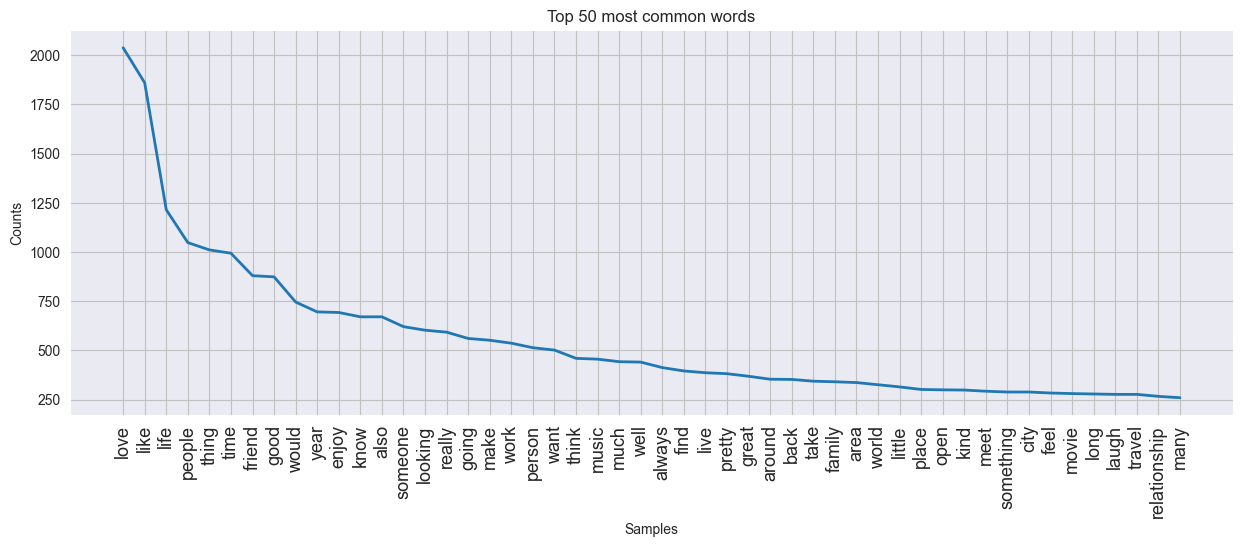

In [103]:
all_words = []
for line in list(bio['final1']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(15,5))
plt.title('Top 50 most common words')
plt.xticks(fontsize=13)
fd = nltk.FreqDist(all_words)
fd.plot(50,cumulative=False)
plt.show()

In [104]:
bio_final = bio[['final1','sentiment_score']]

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

X = tfidf.fit_transform(bio_final['final1'])
print(X.shape)

(2001, 1000)


In [106]:
bio_tfidf = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
bio_tfidf.head()

,ability,able,abroad,absolutely,accent,across,action,active,activity,actually,admit,adore,adult,adventure,adventurous,affectionate,afraid,alive,almost,alone,along,alot,already,also,although,always,amazing,ambitious,america,american,amount,animal,anime,another,answer,anyone,anything,anyway,anywhere,appreciate,area,around,artist,artistic,asian,aspect,athletic,attention,attitude,attracted,...,wanted,warm,watch,watching,water,wear,weather,week,weekend,weird,welcome,well,went,west,whatever,whenever,whether,white,whole,wide,wild,willing,wine,winter,wish,within,without,witty,woman,wonder,wonderful,wood,word,work,worked,worker,working,world,worth,would,write,writer,writing,wrong,yeah,year,yoga,york,young,younger
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.115956,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247145,0.0,0.0,0.0,0.0,0.091542,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065580,0.070728,0.0,0.0,0.0,0.0,0.0,0.0,0.091118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042929,0.0,0.0,0.0,0.0,0.0,0.092865,0.00000,0.0,0.0,0.079101,0.0,0.075541,0.057997,0.0,0.0,0.0,0.051833,0.0522,0.0,0.0,0.202651,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.134463,0.0,0.084299,0.0,0.0,0.0,0.0,0.0,0.048680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061806,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.128531,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.18449,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.357166,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.095407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.089736,0.0,0.0,0.0,0.209898,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.148053,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.334713,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [107]:
df = pd.concat([df,bio_tfidf,bio_final[['sentiment_score']]],axis=1)

df.drop('bio',axis=1,inplace=True)

In [108]:
df.head()

,user_id,sex,education_level,dropped_out,age__17-24,age__25-30,age__31-40,age__41-50,age__50+,height__4-5feets,height__5-6feets,height__6-7feets,status__married,status__seeing someone,status__single,drink__desperately,drink__not at all,drink__often,drink__rarely,drink__socially,drink__very often,drug__never,drug__often,drug__sometimes,job__artistic / musical / writer,job__banking / financial / real estate,job__clerical / administrative,job__computer / hardware / software,job__construction / craftsmanship,job__education / academia,job__entertainment / media,job__executive / management,job__hospitality / travel,job__law / legal services,job__medicine / health,job__other,job__political / government,job__sales / marketing / biz dev,job__science / tech / engineering,job__student,job__transportation,lives_in__san francisco,lives_in__oakland,lives_in__berkeley,lives_in__san mateo,lives_in__palo alto,lives_in__alameda,lives_in__san rafael,lives_in__san leandro,lives_in__redwood city,...,warm,watch,watching,water,wear,weather,week,weekend,weird,welcome,well,went,west,whatever,whenever,whether,white,whole,wide,wild,willing,wine,winter,wish,within,without,witty,woman,wonder,wonderful,wood,word,work,worked,worker,working,world,worth,would,write,writer,writing,wrong,yeah,year,yoga,york,young,younger,sentiment_score
0,fffe3100,0,0.75,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247145,0.0,0.0,0.0,0.0,0.091542,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.214354
1,fffe3200,1,0.50,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.134463,0.0,0.084299,0.0,0.0,0.0,0.0,0.0,0.048680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061806,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.234283
2,fffe3300,0,0.25,0,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.095407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.089736,0.0,0.0,0.0,0.209898,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.148053,0.0,0.0,0.0,0.274019
3,fffe3400,1,0.50,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.334713,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.117687
4,fffe3500,0,0.25,1,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0

In [109]:
df1 = df.set_index('user_id')
df1.head()

,sex,education_level,dropped_out,age__17-24,age__25-30,age__31-40,age__41-50,age__50+,height__4-5feets,height__5-6feets,height__6-7feets,status__married,status__seeing someone,status__single,drink__desperately,drink__not at all,drink__often,drink__rarely,drink__socially,drink__very often,drug__never,drug__often,drug__sometimes,job__artistic / musical / writer,job__banking / financial / real estate,job__clerical / administrative,job__computer / hardware / software,job__construction / craftsmanship,job__education / academia,job__entertainment / media,job__executive / management,job__hospitality / travel,job__law / legal services,job__medicine / health,job__other,job__political / government,job__sales / marketing / biz dev,job__science / tech / engineering,job__student,job__transportation,lives_in__san francisco,lives_in__oakland,lives_in__berkeley,lives_in__san mateo,lives_in__palo alto,lives_in__alameda,lives_in__san rafael,lives_in__san leandro,lives_in__redwood city,lives_in__emeryville,...,warm,watch,watching,water,wear,weather,week,weekend,weird,welcome,well,went,west,whatever,whenever,whether,white,whole,wide,wild,willing,wine,winter,wish,within,without,witty,woman,wonder,wonderful,wood,word,work,worked,worker,working,world,worth,would,write,writer,writing,wrong,yeah,year,yoga,york,young,younger,sentiment_score
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fffe3100,0,0.75,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247145,0.0,0.0,0.0,0.0,0.091542,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.214354
fffe3200,1,0.50,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.134463,0.0,0.084299,0.0,0.0,0.0,0.0,0.0,0.048680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061806,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.234283
fffe3300,0,0.25,0,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.095407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.089736,0.0,0.0,0.0,0.209898,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.148053,0.0,0.0,0.0,0.274019
fffe3400,1,0.50,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.334713,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.117687
fffe3500,0,0.25,1,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [110]:
from sklearn.metrics.pairwise import pairwise_distances

user_correlation = (1 - pairwise_distances(df1, metric='cosine'))*100

print(user_correlation)

[[100.          59.24594655  37.91793993 ...  42.6119884   36.45654505
   43.24593254]
 [ 59.24594655 100.          42.48831083 ...  57.89374307  40.97641513
   41.36169407]
 [ 37.91793993  42.48831083 100.         ...   7.36905148  30.47560205
   30.93982497]
 ...
 [ 42.6119884   57.89374307   7.36905148 ... 100.          30.44442917
   30.50171166]
 [ 36.45654505  40.97641513  30.47560205 ...  30.44442917 100.
   29.71463048]
 [ 43.24593254  41.36169407  30.93982497 ...  30.50171166  29.71463048
  100.        ]]


In [111]:
user_correlation.shape

(2001, 2001)

In [112]:
a = np.matrix(user_correlation)

final_df = pd.concat([df[['user_id']],pd.DataFrame(a,columns=df.user_id)],axis=1)

In [113]:
final_df = final_df.round(2)
final_df.head()

,user_id,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,fffe31003100,fffe31003200,fffe31003300,fffe31003400,fffe31003500,fffe31003600,fffe31003700,fffe31003800,fffe31003900,fffe32003000,fffe32003100,fffe32003200,fffe32003300,fffe32003400,fffe32003500,fffe32003600,fffe32003700,fffe32003800,fffe32003900,fffe33003000,fffe33003100,fffe33003200,fffe33003300,fffe33003400,fffe33003500,fffe33003600,fffe33003700,fffe33003800,fffe33003900,fffe34003000,fffe34003100,fffe34003200,fffe34003300,fffe34003400,fffe34003500,fffe34003600,fffe34003700,fffe34003800,fffe34003900,...,fffe3100390035003200,fffe3100390035003300,fffe3100390035003400,fffe3100390035003500,fffe3100390035003600,fffe3100390035003700,fffe3100390035003800,fffe3100390035003900,fffe3100390036003000,fffe3100390036003100,fffe3100390036003200,fffe3100390036003300,fffe3100390036003400,fffe3100390036003500,fffe3100390036003600,fffe3100390036003700,fffe3100390036003800,fffe3100390036003900,fffe3100390037003000,fffe3100390037003100,fffe3100390037003200,fffe3100390037003300,fffe3100390037003400,fffe3100390037003500,fffe3100390037003600,fffe3100390037003700,fffe3100390037003800,fffe3100390037003900,fffe3100390038003000,fffe3100390038003100,fffe3100390038003200,fffe3100390038003300,fffe3100390038003400,fffe3100390038003500,fffe3100390038003600,fffe3100390038003700,fffe3100390038003800,fffe3100390038003900,fffe3100390039003000,fffe3100390039003100,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
0,fffe3100,100.00,59.25,37.92,42.34,30.01,40.58,31.34,63.19,41.82,40.09,36.68,60.68,36.39,32.90,37.00,43.53,55.04,54.37,36.69,24.93,40.67,72.10,32.70,31.67,61.57,30.91,53.18,43.24,36.90,37.19,41.55,38.23,46.95,46.60,47.99,35.92,57.58,42.62,50.85,51.58,31.20,36.97,49.32,55.75,60.86,36.99,64.96,36.55,38.70,...,42.53,48.25,58.37,45.00,36.01,33.53,35.09,43.74,42.95,54.07,43.80,24.69,47.87,44.75,48.61,44.89,45.73,45.20,24.62,43.70,50.43,53.54,54.76,48.97,49.71,20.14,42.86,46.89,72.00,37.79,32.86,53.56,42.35,48.52,43.95,49.79,36.81,42.32,37.12,37.65,42.96,47.32,41.40,28.19,47.28,41.53,54.95,42.61,36.46,43.25
1,fffe3200,59.25,100.00,42.49,41.18,23.60,45.30,24.47,50.48,45.87,48.01,41.35,53.52,51.91,37.01,41.03,36.68,53.18,46.88,46.60,40.68,50.00,58.95,42.56,35.61,36.90,46.43,52.24,41.71,41.56,41.93,46.10,37.66,55.75,39.32,52.41,40.56,66.17,51.88,43.32,50.19,34.94,41.74,52.84,48.66,53.51,36.10,52.07,35.41,37.09,...,47.18,58.34,51.67,48.84,45.51,49.10,34.08,53.50,35.55,41.13,47.64,18.24,51.66,42.88,41.78,49.60,49.30,54.87,41.03,42.30,37.29,63.70,59.02,41.87,47.37,30.33,46.27,55.26,53.87,41.92,46.77,68.08,46.69,46.69,53.79,30.77,35.83,40.85,46.77,42.10,52.58,51.31,39.84,25.81,51.10,35.08,36.67,57.89,40.98,41.36
2,fffe3300,37.92,42.49,100.00,23.87,35.44,29.02,35.56,34.37,40.94,38.43,30.28,31.95,12.25,31.55,30.19,2.26,19.92,24.41,18.28,35.05,29.78,36.79,19.09,12.93,25.40,12.83,23.68,42.27,31.08,30.75,18.36,25.70,23.97,34.61,30.49,24.10,35.91,53.01,21.11,29.69,29.53,42.70,36.60,25.00,33.18,30.28,31.18,20.07,31.02,...,18.51,31.52,36.59,20.31,34.84,23.30,23.73,37.11,24.42,13.86,20.06,40.06,33.60,13.77,24.66,20.57,20.66,13.99,18.37,30.58,13.79,24.41,22.41,36.00,31.10,24.47,31.75,24.35,32.10,26.61,47.08,47.68,36.47,35.84,48.97,25.62,13.28,24.18,42.36,24.96,25.53,13.40,46.07,36.77,23.94,29.63,18.95,7.37,30.48,30.94
3,fffe3400,42.34,41.18,23.87,100.00,47.42,47.07,36.34,52.19,35.37,41.56,36.59,42.05,53.64,42.42,41.23,37.35,54.00,48.40,48.05,48.03,45.25,42.43,31.87,53.75,43.47,30.11,53.92,30.70,29.68,37.27,42.10,31.92,39.83,35.24,29.84,47.64,45.25,46.36,48.96,45.00,35.62,30.05,42.13,37.78,35.67,42.50,46.71,23.25,25.34,...,42.39,53.54,57.52,37.42,47.50,34.88,51.59,48.06,31.05,35.97,53.46,35.38,46.25,49.98,54.72,43.68,38.11,50.23,30.52,49.73,49.85,47.40,35.33,31.09,42.31,37.07,34.30,56.24,47.88,29.74,24.78,51.90,46.72,

In [114]:
sample = pd.read_csv('/Users/arnav/Downloads/data.csv')

sample = sample[['user_id','sex','orientation']]

sample["pref"] = sample["sex"] + " " + sample["orientation"]

sample["pref"] = sample["pref"].astype("category")

sample["code"] = sample["pref"].cat.codes

sample["code"] = sample["code"] + 1

sample.head()

,user_id,sex,orientation,pref,code
0,fffe3100,f,gay,f gay,2
1,fffe3200,m,gay,m gay,5
2,fffe3300,f,bisexual,f bisexual,1
3,fffe3400,m,bisexual,m bisexual,4
4,fffe3500,f,bisexual,f bisexual,1


In [115]:
table = pd.DataFrame({'user_id':final_df.columns})
table = table.iloc[1:,:]

table['uid'] = range(1,2002)

table.head()

,user_id,uid
1,fffe3100,1
2,fffe3200,2
3,fffe3300,3
4,fffe3400,4
5,fffe3500,5


In [116]:
sample = sample.merge(table,on='user_id')
sample.head()

,user_id,sex,orientation,pref,code,uid
0,fffe3100,f,gay,f gay,2,1
1,fffe3200,m,gay,m gay,5,2
2,fffe3300,f,bisexual,f bisexual,1,3
3,fffe3400,m,bisexual,m bisexual,4,4
4,fffe3500,f,bisexual,f bisexual,1,5


In [117]:
sample.groupby('pref')['code'].mean()

pref
f bisexual    1.0
f gay         2.0
f straight    3.0
m bisexual    4.0
m gay         5.0
m straight    6.0
Name: code, dtype: float64

In [118]:
sample2 = sample[["uid","code"]].merge(sample[["uid","code"]], on="code")

sample2 = sample2.pivot_table(index='uid_x',columns='uid_y',values='code')

sample2

uid_y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
uid_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,6.0,NaN,NaN,6.0,6.0,NaN,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,6.0,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN,6.0,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,6.0,6.0,6.0,NaN,6.0,...,6.0,NaN,NaN,NaN,6.0,NaN,6.0,6.0,NaN,6.0,NaN,6.0,6.0,NaN,6.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,6.0,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,6.0,NaN,NaN,6.0,6.0,NaN,6.0,6.0,NaN
1998,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,6.0,NaN,NaN,6.0,6.0,NaN,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,6.0,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN,6.0,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,6.0,6.0,6.0,NaN,6.0,...,6.0,NaN,NaN,NaN,6.0,NaN,6.0

In [119]:
sample3 = sample2.replace([4,np.NaN,2,3,5,6],[1,1,0,0,0,0])
sample3

uid_y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
uid_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1998,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0

In [120]:
b = np.matrix(sample3)
np.fill_diagonal(b,0.00)

sample4 = pd.DataFrame(b,columns=sample3.columns)

sample4.index = sample4.columns

sample4

uid_y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
uid_y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1998,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0

In [121]:
sample5 = pd.DataFrame(np.multiply(np.matrix(final_df.iloc[:,1:]), np.matrix(sample4)),columns=final_df.columns[1:])
sample5.index = final_df.columns[1:]
sample5.reset_index(inplace=True)
sample5.rename(columns={'index':'user_id'},inplace=True)
sample5.head()

,user_id,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,fffe31003100,fffe31003200,fffe31003300,fffe31003400,fffe31003500,fffe31003600,fffe31003700,fffe31003800,fffe31003900,fffe32003000,fffe32003100,fffe32003200,fffe32003300,fffe32003400,fffe32003500,fffe32003600,fffe32003700,fffe32003800,fffe32003900,fffe33003000,fffe33003100,fffe33003200,fffe33003300,fffe33003400,fffe33003500,fffe33003600,fffe33003700,fffe33003800,fffe33003900,fffe34003000,fffe34003100,fffe34003200,fffe34003300,fffe34003400,fffe34003500,fffe34003600,fffe34003700,fffe34003800,fffe34003900,...,fffe3100390035003200,fffe3100390035003300,fffe3100390035003400,fffe3100390035003500,fffe3100390035003600,fffe3100390035003700,fffe3100390035003800,fffe3100390035003900,fffe3100390036003000,fffe3100390036003100,fffe3100390036003200,fffe3100390036003300,fffe3100390036003400,fffe3100390036003500,fffe3100390036003600,fffe3100390036003700,fffe3100390036003800,fffe3100390036003900,fffe3100390037003000,fffe3100390037003100,fffe3100390037003200,fffe3100390037003300,fffe3100390037003400,fffe3100390037003500,fffe3100390037003600,fffe3100390037003700,fffe3100390037003800,fffe3100390037003900,fffe3100390038003000,fffe3100390038003100,fffe3100390038003200,fffe3100390038003300,fffe3100390038003400,fffe3100390038003500,fffe3100390038003600,fffe3100390038003700,fffe3100390038003800,fffe3100390038003900,fffe3100390039003000,fffe3100390039003100,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
0,fffe3100,0.00,59.25,37.92,42.34,30.01,40.58,0.00,63.19,41.82,40.09,36.68,60.68,36.39,32.90,37.00,43.53,55.04,54.37,36.69,24.93,40.67,72.10,32.70,31.67,61.57,30.91,53.18,43.24,36.90,37.19,41.55,38.23,46.95,46.60,47.99,35.92,57.58,42.62,50.85,51.58,31.20,0.00,49.32,55.75,60.86,36.99,64.96,36.55,38.70,...,42.53,48.25,58.37,45.00,36.01,33.53,35.09,43.74,42.95,54.07,43.80,24.69,47.87,44.75,48.61,44.89,45.73,45.20,24.62,43.70,50.43,53.54,54.76,48.97,49.71,20.14,42.86,46.89,72.00,37.79,32.86,53.56,42.35,48.52,43.95,49.79,36.81,42.32,37.12,37.65,42.96,47.32,41.40,28.19,47.28,41.53,0.00,42.61,36.46,43.25
1,fffe3200,59.25,0.00,42.49,41.18,23.60,45.30,24.47,50.48,0.00,48.01,41.35,53.52,51.91,37.01,41.03,36.68,53.18,46.88,46.60,40.68,0.00,58.95,42.56,35.61,36.90,0.00,52.24,41.71,41.56,41.93,46.10,37.66,55.75,0.00,0.00,40.56,66.17,51.88,43.32,50.19,34.94,41.74,52.84,48.66,53.51,36.10,52.07,35.41,37.09,...,47.18,58.34,0.00,48.84,45.51,0.00,34.08,53.50,35.55,41.13,47.64,18.24,51.66,42.88,41.78,49.60,49.30,54.87,41.03,42.30,37.29,63.70,59.02,41.87,47.37,30.33,46.27,55.26,53.87,41.92,46.77,68.08,46.69,46.69,53.79,30.77,35.83,40.85,46.77,42.10,0.00,51.31,0.00,25.81,51.10,35.08,36.67,57.89,40.98,41.36
2,fffe3300,37.92,42.49,0.00,23.87,35.44,29.02,35.56,34.37,40.94,38.43,30.28,31.95,12.25,31.55,30.19,2.26,19.92,24.41,18.28,35.05,29.78,36.79,19.09,12.93,25.40,12.83,23.68,42.27,31.08,30.75,18.36,25.70,23.97,34.61,30.49,24.10,35.91,53.01,21.11,29.69,29.53,42.70,36.60,25.00,33.18,30.28,31.18,20.07,31.02,...,18.51,31.52,36.59,20.31,34.84,23.30,23.73,37.11,24.42,13.86,20.06,40.06,33.60,13.77,24.66,20.57,20.66,13.99,18.37,30.58,13.79,24.41,22.41,36.00,31.10,24.47,31.75,24.35,32.10,26.61,47.08,47.68,36.47,35.84,48.97,25.62,13.28,24.18,42.36,24.96,25.53,13.40,46.07,36.77,23.94,29.63,18.95,7.37,30.48,30.94
3,fffe3400,42.34,41.18,23.87,0.00,47.42,47.07,36.34,52.19,35.37,41.56,36.59,42.05,53.64,42.42,41.23,37.35,54.00,48.40,48.05,48.03,45.25,42.43,31.87,53.75,43.47,30.11,53.92,30.70,29.68,37.27,42.10,31.92,39.83,35.24,29.84,47.64,45.25,46.36,48.96,45.00,35.62,30.05,42.13,37.78,35.67,42.50,46.71,23.25,25.34,...,42.39,53.54,57.52,37.42,47.50,34.88,51.59,48.06,31.05,35.97,53.46,35.38,46.25,49.98,54.72,43.68,38.11,50.23,30.52,49.73,49.85,47.40,35.33,31.09,42.31,37.07,34.30,56.24,47.88,29.74,24.78,51.90,46.72,36.98,30.66,50.33,59

New ML Model 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_cnn_model(input_shape):
    model = models.Sequential([
        # Convolutional layer: 32 filters, kernel size of 3x3, activation 'relu'
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        # Max pooling layer: Pool size of 2x2
        layers.MaxPooling2D((2, 2)),
        # Adding more layers to deepen the network
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        # Flattening the 3D output to 1D
        layers.Flatten(),
        # Dense layer for classification
        layers.Dense(64, activation='relu'),
        # Output layer: Adjust the units based on your specific needs (e.g., binary matching could use 1)
        layers.Dense(10, activation='softmax')
    ])
    return model

# Assuming input images are resized to 128x128 pixels with 3 channels (RGB)
input_shape = (128, 128, 3)
model = build_cnn_model(input_shape)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
